# Predict the mortgage backed securities prepayment risk using machine learning models


In [62]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Loading Data

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df=pd.read_csv('/content/drive/MyDrive/data/LoanExport.csv')
df.head()

<ipython-input-64-df1e79fe4820>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/data/LoanExport.csv')


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [65]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


# Cleaning the data

###Considering the value 'X' as Nan

In [67]:
df = df.replace('X ', np.nan)

In [68]:
df.isna().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType             22
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers            339
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [114]:
df.PropertyType= df.PropertyType.fillna(df.PropertyType.mode()[0])
df.NumBorrowers= df.NumBorrowers.fillna(df.NumBorrowers.mode()[0])

###Dropping Unwanted Columns

In [69]:
removed_col = ['LoanSeqNum','SellerName','ServicerName','PostalCode']

df.drop(columns=removed_col, inplace=True)

In [115]:
df.isnull().sum().sum()

0

In [70]:
df.shape

(291451, 24)

In [71]:
print(df.nunique())

CreditScore           370
FirstPaymentDate       66
FirstTimeHomebuyer      3
MaturityDate           96
MSA                   392
MIP                    37
Units                   5
Occupancy               3
OCLTV                 102
DTI                    66
OrigUPB               375
LTV                    97
OrigInterestRate      254
Channel                 4
PPM                     3
ProductType             1
PropertyState          53
PropertyType            6
LoanPurpose             3
OrigLoanTerm           61
NumBorrowers            2
EverDelinquent          2
MonthsDelinquent      174
MonthsInRepayment     212
dtype: int64


# **Data Encoding**

In [72]:
encode = LabelEncoder()
i = ['FirstTimeHomebuyer','Occupancy','Channel','PPM','LoanPurpose']
for col in i:
    df[col] = encode.fit_transform(df[col].astype(str))

In [73]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PPM,ProductType,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,0,202901,16974,25,1,1,89,27,...,0,FRM,IL,SF,2,360,2,0,0,52
1,0,199902,0,202901,19740,0,1,1,73,17,...,0,FRM,CO,SF,1,360,1,0,0,144
2,0,199902,0,202901,29940,0,1,1,75,16,...,0,FRM,KS,SF,1,360,2,0,0,67
3,0,199902,0,202901,31084,0,1,1,76,14,...,0,FRM,CA,SF,1,360,2,0,0,35
4,0,199902,0,202901,35644,0,1,1,78,18,...,0,FRM,NJ,SF,1,360,2,0,0,54


In [74]:
# Convert 'MaturityDate' column to datetime format
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'])

# Convert 'FirstPaymentDate' column to datetime format
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'])

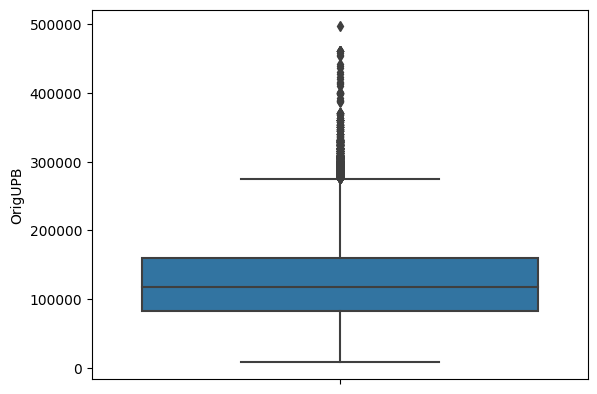

In [75]:
# outliers

sns.boxplot(data=df, y='OrigUPB')

Q1 = df['OrigUPB'].quantile(0.25)
Q3 = df['OrigUPB'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['OrigUPB'] < lower_bound) | (df['OrigUPB'] > upper_bound)]

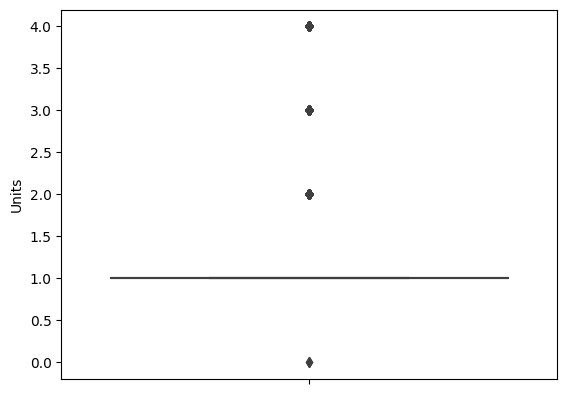

In [76]:
# outliers

sns.boxplot(data=df, y='Units')

Q1 = df['Units'].quantile(0.25)
Q3 = df['Units'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Units'] < lower_bound) | (df['Units'] > upper_bound)]


In [77]:
#checking for duplicates values to drop them
duplicate=df.duplicated()
print(duplicate.sum())
df.drop_duplicates(inplace=True)

39


In [78]:
df.shape

(291412, 24)

Create a heatmap of the correlation matrix

<ipython-input-79-a53b8782edac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


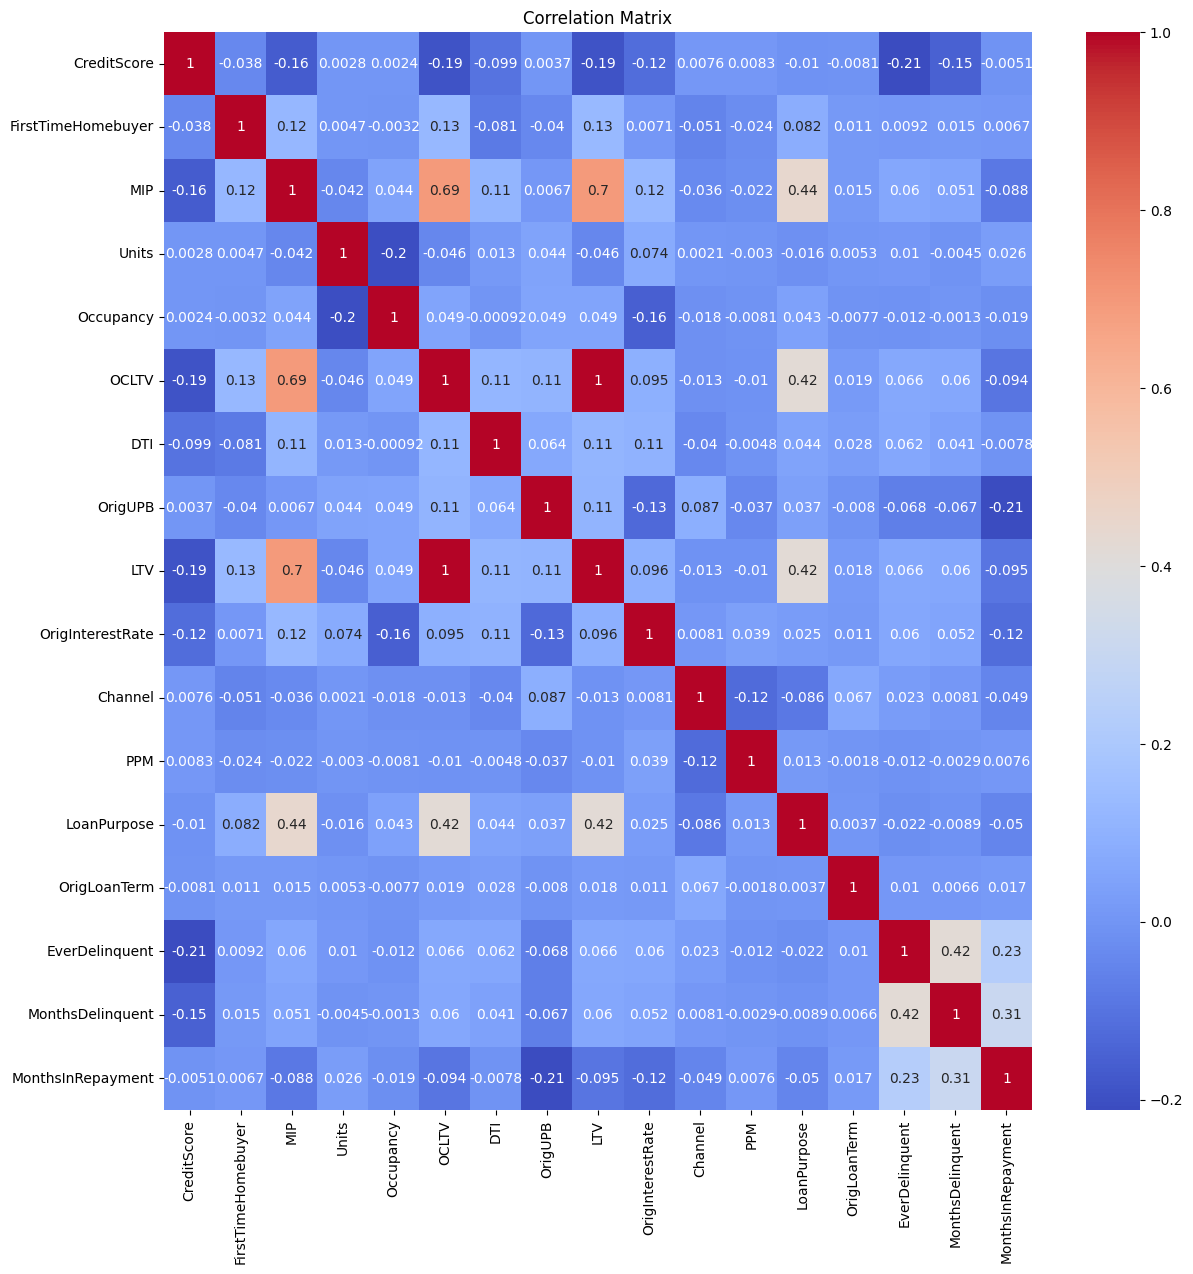

In [79]:
# Create the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.title('Correlation Matrix')
plt.show()

<Axes: ylabel='count'>

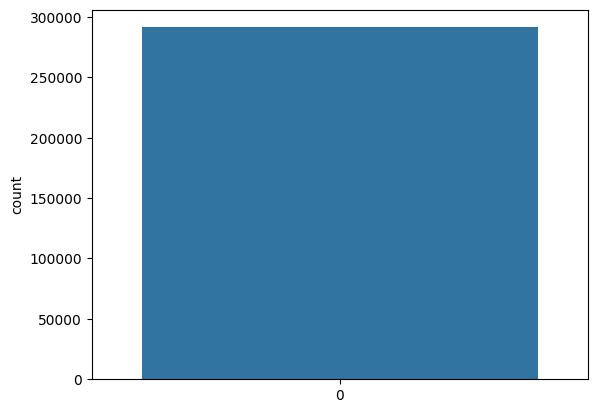

In [80]:
sns.countplot(df['CreditScore'])

<Axes: xlabel='MaturityDate', ylabel='count'>

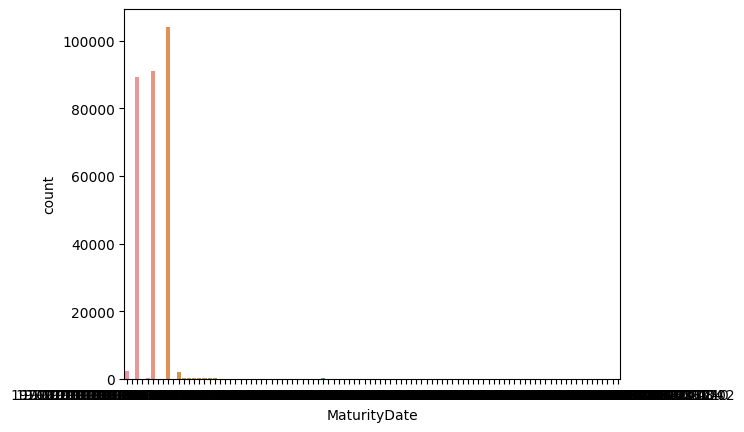

In [81]:
sns.countplot(data= df, x='MaturityDate')

<Axes: xlabel='FirstTimeHomebuyer', ylabel='count'>

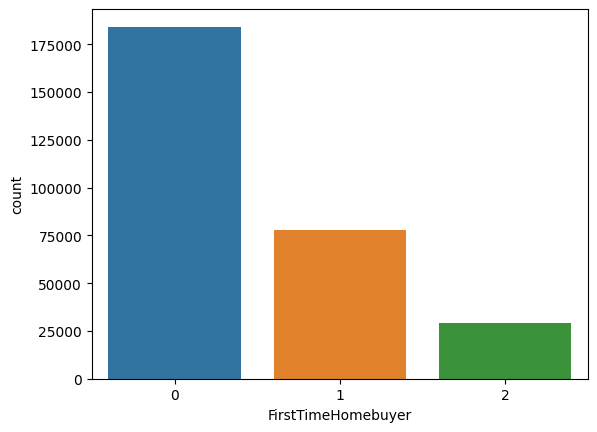

In [82]:
sns.countplot(data=df, x='FirstTimeHomebuyer')


# **Data Labeling**

In [83]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [84]:
df.drop(["MonthsInRepayment",'MonthsDelinquent'],axis=1,inplace=True)

df.drop(["FirstPaymentDate","MaturityDate"],axis=1,inplace=True)
x=df.drop(['EverDelinquent'], axis=1)
y=df['EverDelinquent']

In [85]:
x.head(50)

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers
0,0,0,16974,25,1,1,89,27,117000,89,6.750,3,0,FRM,IL,SF,2,360,2
1,0,0,19740,0,1,1,73,17,109000,73,6.500,2,0,FRM,CO,SF,1,360,1
2,0,0,29940,0,1,1,75,16,88000,75,6.875,3,0,FRM,KS,SF,1,360,2
3,0,0,31084,0,1,1,76,14,160000,76,6.875,2,0,FRM,CA,SF,1,360,2
4,0,0,35644,0,1,1,78,18,109000,78,7.125,2,0,FRM,NJ,SF,1,360,2
5,0,0,X,25,1,1,89,40,207000,89,7.125,3,0,FRM,CO,SF,1,360,2
6,0,0,X,25,1,1,90,21,111000,90,6.875,3,0,FRM,WI,SF,2,360,1
7,0,1,36740,0,1,1,72,20,97000,72,6.750,2,0,FRM,FL,SF,1,360,1
8,0,2,25540,30,1,1,95,38,55000,95,7.000,2,1,FRM,CT,SF,2,345,1
9,0,2,48620,30,1,1,95,27,35000,95,7.125,3,0,FRM,KS,SF,2,360,1


In [86]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: EverDelinquent, dtype: int64

   CreditScore  FirstTimeHomebuyer    MSA  MIP  Units  Occupancy  OCLTV  DTI  \
0            0                   0  16974   25      1          1     89   27   
1            0                   0  19740    0      1          1     73   17   
2            0                   0  29940    0      1          1     75   16   
3            0                   0  31084    0      1          1     76   14   
4            0                   0  35644    0      1          1     78   18   

   OrigUPB  LTV  OrigInterestRate  Channel  PPM ProductType PropertyState  \
0   117000   89             6.750        3    0       FRM              IL   
1   109000   73             6.500        2    0       FRM              CO   
2    88000   75             6.875        3    0       FRM              KS   
3   160000   76             6.875        2    0       FRM              CA   
4   109000   78             7.125        2    0       FRM              NJ   

  PropertyType  LoanPurpose  OrigLoanTerm NumBorrowers  

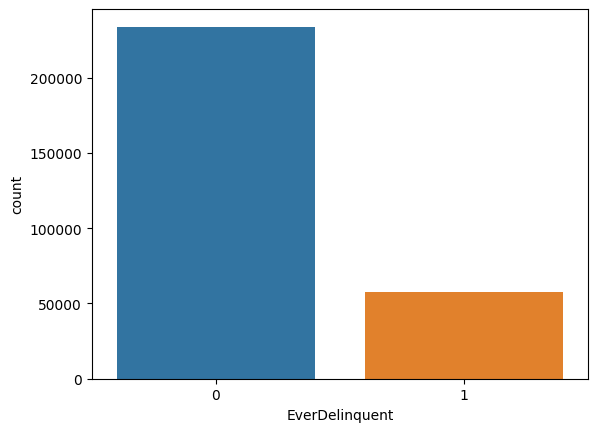

In [87]:
# Display the first few rows of the data
print(df.head())

# Check the data types of each column
print(df.dtypes)

# Get summary statistics of the numerical columns
print(df.describe())

# Check the distribution of the target variable
sns.countplot(x='EverDelinquent', data=df)
plt.show()


In [88]:
# Check for missing values in each column
print(df.isnull().sum())

# If there are missing values, decide how to handle them (e.g., imputation or removal)
# Impute missing values with the mean of the column
df.fillna(df.mean(), inplace=True)



CreditScore             0
FirstTimeHomebuyer      0
MSA                     0
MIP                     0
Units                   0
Occupancy               0
OCLTV                   0
DTI                     0
OrigUPB                 0
LTV                     0
OrigInterestRate        0
Channel                 0
PPM                     0
ProductType             0
PropertyState           0
PropertyType           22
LoanPurpose             0
OrigLoanTerm            0
NumBorrowers          338
EverDelinquent          0
dtype: int64


<ipython-input-88-39cc3dbfeec9>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


<ipython-input-89-60f857a5b6aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


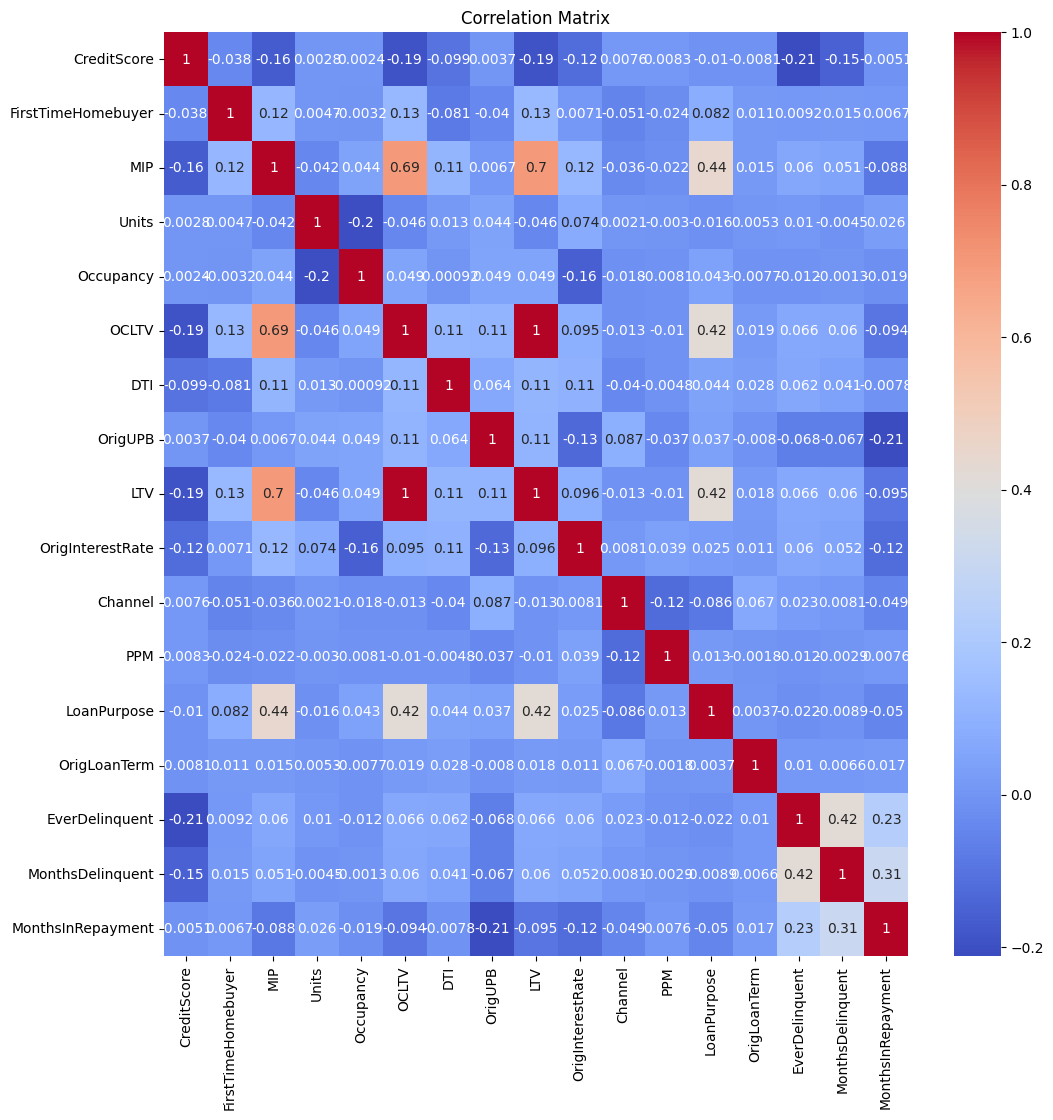

In [89]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.title('Correlation Matrix')
plt.show()

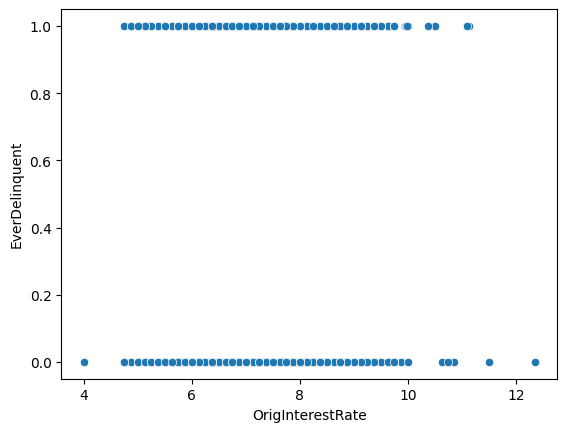

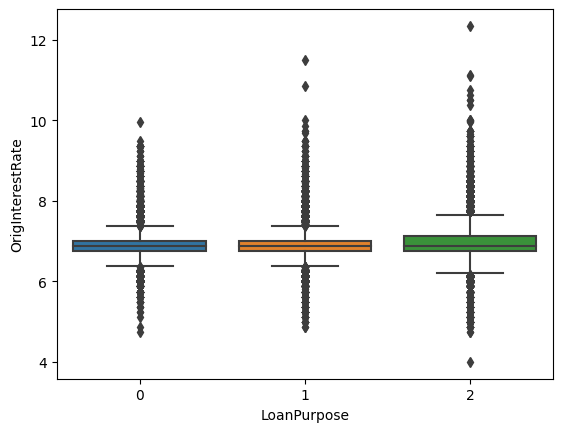

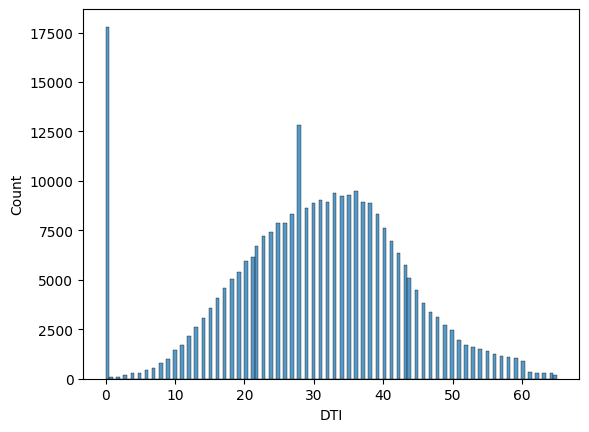

In [90]:
sns.scatterplot(x='OrigInterestRate', y='EverDelinquent', data=df)
plt.show()
# Box plot of a variable grouped by another variable
sns.boxplot(x='LoanPurpose', y='OrigInterestRate', data=df)
plt.show()
# Histogram of a variable
sns.histplot(x='DTI', data=df)
plt.show()

In [91]:
# Create empty lists to store the column names
numerical_cols = []
categorical_cols = []

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column data type is numerical
    if df[column].dtype in [int, float]:
        numerical_cols.append(column)
    else:
        categorical_cols.append(column)

In [92]:
categorical_cols

['MSA', 'ProductType', 'PropertyState', 'PropertyType', 'NumBorrowers']

In [93]:
numerical_cols

['CreditScore',
 'FirstTimeHomebuyer',
 'MIP',
 'Units',
 'Occupancy',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'LTV',
 'OrigInterestRate',
 'Channel',
 'PPM',
 'LoanPurpose',
 'OrigLoanTerm',
 'EverDelinquent']

In [94]:
df.shape

(291412, 20)

In [95]:
dataFrame = df

In [96]:
# encoding

# Select the columns to encode
columns_to_encode = categorical_cols

label_encoder = LabelEncoder()

# Encode each column using LabelEncoder
for column in columns_to_encode:
    dataFrame[column] = label_encoder.fit_transform(dataFrame[column])

# Print the encoded DataFrame
dataFrame

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent
0,0,0,68,25,1,1,89,27,117000,89,6.750,3,0,0,15,5,2,360,1,0
1,0,0,95,0,1,1,73,17,109000,73,6.500,2,0,0,5,5,1,360,0,0
2,0,0,198,0,1,1,75,16,88000,75,6.875,3,0,0,17,5,1,360,1,0
3,0,0,210,0,1,1,76,14,160000,76,6.875,2,0,0,4,5,1,360,1,0
4,0,0,250,0,1,1,78,18,109000,78,7.125,2,0,0,32,5,1,360,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,0,274,0,1,1,60,32,90000,60,7.000,2,0,0,39,5,1,360,1,0
291447,840,0,250,0,1,1,73,0,267000,73,6.375,1,0,0,35,5,2,319,1,0
291448,840,0,323,0,1,1,73,31,87000,73,5.625,2,0,0,4,5,1,313,0,0
291449,845,0,274,0,1,0,80,54,88000,80,7.000,2,0,0,39,5,2,360,1,0


In [97]:
dataFrame.shape

(291412, 20)

# Feature engineering

The goal of feature engineering is simply to make the data better suited to the problem. It improves the model's performance and reduces computational needs.

In [98]:
X=dataFrame.drop(['EverDelinquent'], axis=1)
y=dataFrame['EverDelinquent']

In [99]:
X.shape

(291412, 19)

In [100]:
y.shape

(291412,)

# Mutual Information

Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other.

In [101]:
discrete_features = X.dtypes == int

In [102]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

CreditScore         0.038882
PropertyType        0.007139
Occupancy           0.006599
NumBorrowers        0.006286
PropertyState       0.004988
DTI                 0.002693
OrigInterestRate    0.000177
Name: MI Scores, dtype: float64

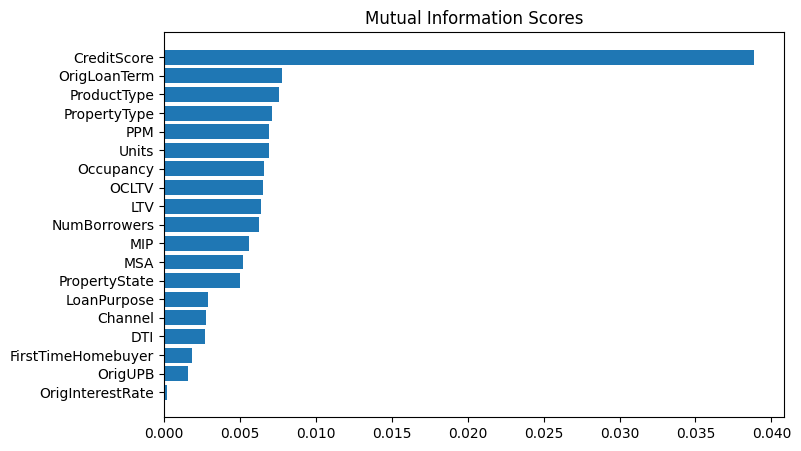

In [103]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

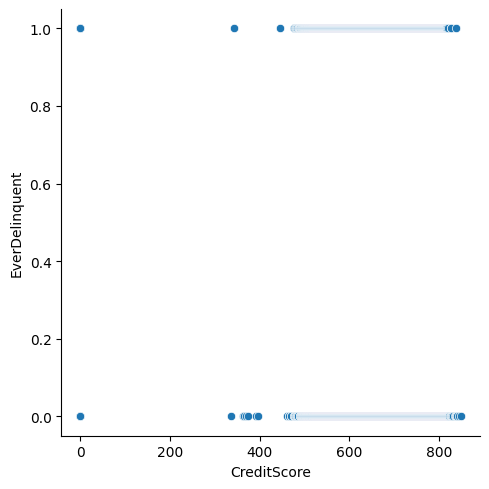

In [104]:
sns.relplot(x="CreditScore", y="EverDelinquent", data=dataFrame);

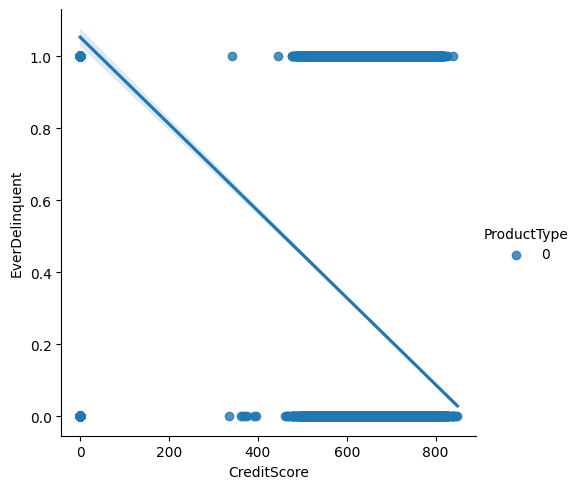

In [105]:
sns.lmplot(x="CreditScore", y="EverDelinquent", hue="ProductType", data=dataFrame)

# Reshaping features (Data visualization)

Data visualization can suggest transformations, often a "reshaping" of a feature through powers or logarithms.

<ipython-input-106-316d6c5f6e98>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataFrame.CreditScore, shade=True, ax=axs[0])
<ipython-input-106-316d6c5f6e98>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataFrame.LogCreditScore, shade=True, ax=axs[1]);


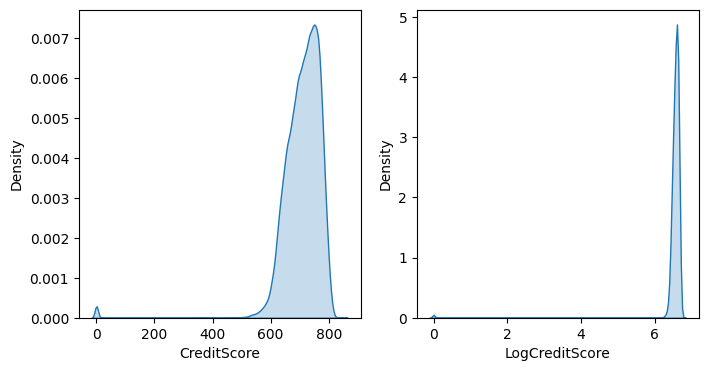

In [106]:
dataFrame["LogCreditScore"] = dataFrame.CreditScore.apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(dataFrame.CreditScore, shade=True, ax=axs[0])
sns.kdeplot(dataFrame.LogCreditScore, shade=True, ax=axs[1]);

# K means Clustering


In [107]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,Cluster
0,0,0,68,25,1,1,89,27,117000,89,6.750,3,0,0,15,5,2,360,1,4
1,0,0,95,0,1,1,73,17,109000,73,6.500,2,0,0,5,5,1,360,0,4
2,0,0,198,0,1,1,75,16,88000,75,6.875,3,0,0,17,5,1,360,1,1
3,0,0,210,0,1,1,76,14,160000,76,6.875,2,0,0,4,5,1,360,1,0
4,0,0,250,0,1,1,78,18,109000,78,7.125,2,0,0,32,5,1,360,1,4


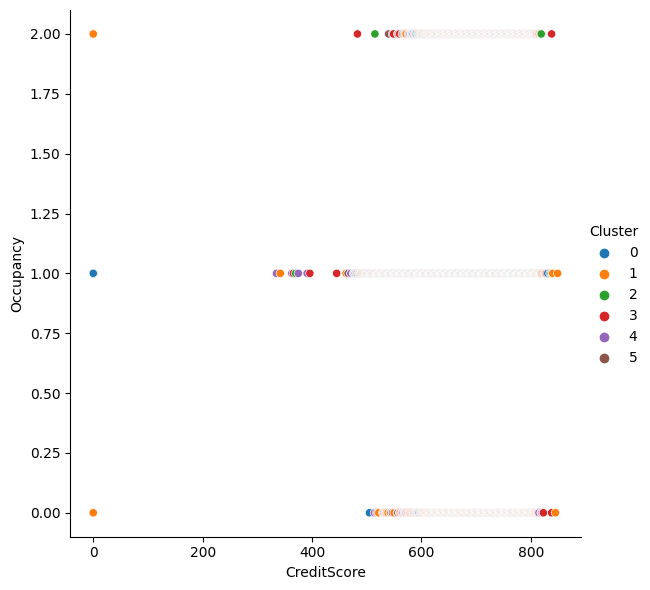

In [108]:
sns.relplot(
    x="CreditScore", y="Occupancy", hue="Cluster", data=X, height=6,
);

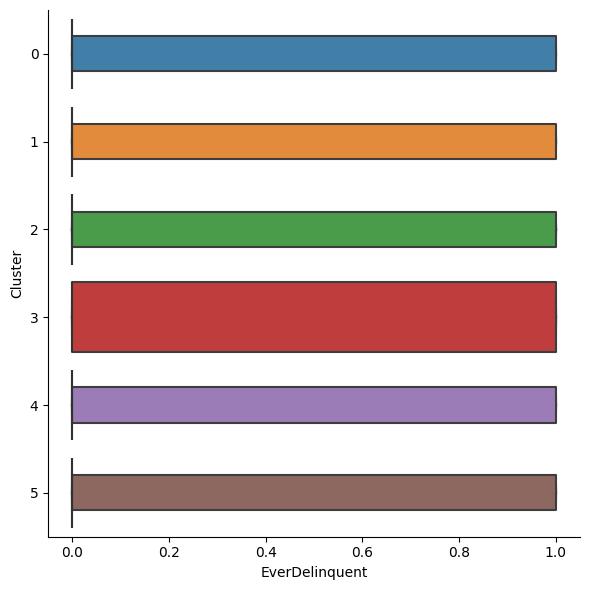

In [109]:
X["EverDelinquent"] = df["EverDelinquent"]
sns.catplot(x="EverDelinquent", y="Cluster", data=X, kind="boxen", height=6);

# PCA

Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data.

In [110]:
X_scaled = X

from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,-7946.319272,166.026332,707.454442,34.841160,-5.593937,14.679044,6.064756,-0.063313,1.695284,0.022802,...,-1.220425,-0.347723,0.492299,-0.984654,0.017374,-0.461010,0.036797,0.099950,-0.000184,-5.095984e-16
1,-15946.321218,139.122678,704.955262,66.957655,-12.022091,23.104453,-6.654160,-0.109908,1.660004,0.045750,...,-0.901672,0.451528,-0.744758,-1.102664,-0.017158,-0.629535,-0.058755,0.105470,-0.021220,-6.377020e-17
2,-36946.325604,36.954960,705.686648,61.754385,-1.507096,23.396890,-7.943047,-0.132029,-1.264048,0.052641,...,-0.908900,-0.287983,0.458710,-0.973939,0.002050,-0.290510,-0.003865,0.037550,-0.001116,-9.360497e-17
3,35053.674149,22.084851,705.885547,64.410336,-11.960712,27.411550,-7.466129,-0.121964,-2.513558,0.147230,...,-0.918172,0.693897,0.069807,-0.896206,-0.034869,-0.216909,-0.099422,0.031704,-0.028060,-2.933071e-17
4,-15946.327983,-15.951443,706.391902,56.785858,13.276401,20.768365,-9.117460,-0.180954,1.693106,0.144786,...,-0.906301,0.653924,0.168588,-0.916984,-0.040963,-0.008609,-0.104191,-0.018386,-0.012207,-1.315454e-17


In [111]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
CreditScore,4.779022e-06,-0.004669,-0.996892,-0.077280,-0.004304,-0.013792,6.571576e-04,-7.514900e-05,-0.000071,-8.335850e-04,...,7.570652e-04,3.631411e-05,-2.561883e-05,1.150767e-03,-2.018382e-05,3.581855e-04,-3.751857e-05,-7.848137e-05,5.774599e-06,1.986340e-21
FirstTimeHomebuyer,-4.978670e-07,0.000117,0.000399,-0.003733,0.000249,0.005275,1.975559e-03,-3.494558e-03,0.001158,2.459595e-02,...,7.129808e-01,-5.564863e-02,7.597589e-02,5.703846e-03,6.393796e-03,3.305335e-03,1.544039e-02,-6.647607e-03,-1.879243e-03,-1.170161e-16
MSA,-4.058964e-05,-0.999926,0.005326,-0.008560,-0.005875,0.003332,3.234339e-04,-1.270448e-04,-0.000131,1.518440e-04,...,-5.475255e-05,-7.960794e-05,-1.238503e-04,-3.594465e-05,3.174607e-05,-9.132636e-05,-5.880857e-05,4.564240e-05,-7.615371e-05,1.823468e-20
MIP,1.574806e-06,0.004543,0.034036,-0.430598,-0.058347,0.013306,8.997045e-01,-1.086974e-04,-0.000237,-2.759414e-03,...,1.020770e-02,1.411220e-03,-7.503571e-04,-1.028108e-03,1.939520e-03,-2.229127e-03,1.048404e-03,1.092311e-03,4.261035e-05,7.700966e-19
Units,1.660416e-07,-0.000054,-0.000011,0.000436,0.000064,-0.000283,-2.870225e-05,-5.745036e-04,-0.000475,-5.966104e-03,...,1.545658e-03,-5.801130e-03,-1.873601e-02,1.078419e-02,-4.420265e-03,1.008676e-01,-2.935683e-02,4.884129e-01,8.659118e-01,-2.956531e-17
Occupancy,2.109926e-07,-0.000053,-0.000003,-0.000490,0.000026,0.000198,3.190201e-04,7.632709e-04,-0.000280,1.350380e-02,...,-7.050463e-03,1.323835e-02,6.615164e-03,-1.348308e-02,1.864870e-03,-2.051166e-01,2.992268e-02,-8.407036e-01,4.996110e-01,-5.142305e-17
OCLTV,3.016262e-05,0.006051,0.047886,-0.630077,-0.045190,0.065332,-3.088170e-01,1.063552e-03,0.001627,1.688209e-03,...,-4.715629e-03,2.313903e-02,-6.647854e-04,-4.405619e-03,7.058058e-01,1.452263e-02,4.888983e-03,3.967087e-04,2.428043e-03,7.397122e-17
DTI,1.566925e-05,-0.001936,0.020293,-0.079500,-0.100017,-0.991086,-3.061216e-02,4.666919e-03,-0.000203,1.520300e-03,...,3.248049e-03,-9.828359e-04,4.325894e-03,-9.197390e-04,-2.889833e-04,-2.251774e-03,4.135205e-04,3.335568e-04,-1.121700e-04,-2.467590e-19
OrigUPB,1.000000e+00,-0.000041,0.000002,0.000037,0.000033,0.000009,1.819065e-05,-5.536619e-07,-0.000003,1.930969e-06,...,6.374734e-07,2.721003e-07,-2.108956e-06,3.079433e-07,-1.129722e-07,9.062684e-07,7.806503e-08,-1.337986e-07,-2.802066e-07,-2.757738e-22
LTV,2.998461e-05,0.006011,0.047905,-0.629788,-0.045367,0.065780,-3.058882e-01,1.599173e-03,0.001459,-5.173517e-03,...,9.208252e-03,-2.088534e-02,1.178358e-03,3.495075e-03,-7.072468e-01,-1.521046e-02,-5.287445e-03,4.409499e-04,-2.078735e-03,-7.354328e-17


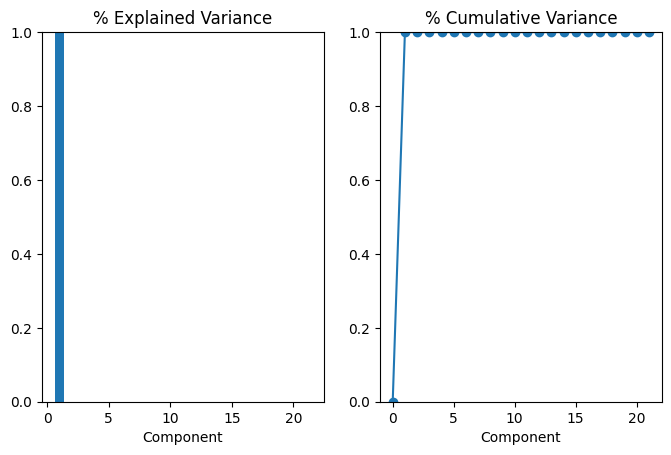

In [112]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
plot_variance(pca);

In [113]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC15    0.489757
PC14    0.038871
PC3     0.036393
PC13    0.033411
PC16    0.015506
PC17    0.009555
PC18    0.008172
PC9     0.006237
PC2     0.004043
PC1     0.003926
PC4     0.003245
PC12    0.003088
PC8     0.002893
PC6     0.002210
PC11    0.002162
PC20    0.002075
PC19    0.001914
PC5     0.001819
PC7     0.001506
PC10    0.001182
PC21    0.000000
Name: MI Scores, dtype: float64